<a href="https://colab.research.google.com/github/Justus-coded/DPhi-Deep-Learning-Bootcamp/blob/master/Assignment2_Starter_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Please follow the below instructions to load the dataset in Notebook.**

## Download Data From GitHub
First we need to get the data. We have given the GitHub link under the '[Data](https://dphi.tech/practice/challenge/34#data)' section of the [problem page](https://dphi.tech/practice/challenge/34) which has all the required train images (to build the model) and test datat images for which one need to predict the labels (animal specie) and submit the predictions on the [DPhi platform](https://dphi.tech/practice/challenge/34#submission). 

#### Download GitHub Repository
The first step is to download the repository 'Datasets' to the colab files. We can achieve this by executing the below code.

In [1]:
!git clone 'https://github.com/dphi-official/Datasets/'

Cloning into 'Datasets'...
remote: Enumerating objects: 9874, done.
remote: Total 9874 (delta 0), reused 0 (delta 0), pack-reused 9874
Receiving objects: 100% (9874/9874), 427.70 MiB | 39.65 MiB/s, done.
Resolving deltas: 100% (102/102), done.
Checking out files: 100% (9345/9345), done.


Now if you check the colab files, you have everything that was available in the 'Datasets' repository.

![image](https://github.com/dphi-official/Deep_Learning_Bootcamp/blob/master/Assignment_2/beg_ass_2_gsc.jpg?raw=true)

**Note:** These files will be available in colab files for significant (not sure but 12 to 24 hours maybe) amount of time.

The files inside 'animal_data' folder looks like this:

![image2](https://github.com/dphi-official/Deep_Learning_Bootcamp/blob/master/Assignment_2/beg_ass_2_gsc_1.jpg?raw=true)

We need to extract the two zip files 'test_beg.zip' which contains testing images and 'train_beg.zip' contains images for training the model. To extract these zip files execute below code.

In [2]:
# To unzip train_beg.zip
!unzip /content/Datasets/animal_data/train_beg.zip 

# To unzip test_beg.zip
!unzip /content/Datasets/animal_data/test_beg.zip

Archive:  /content/Datasets/animal_data/train_beg.zip
   creating: train_beg/
  inflating: train_beg/Image_1.jpg   
  inflating: train_beg/Image_10.jpg  
  inflating: train_beg/Image_100.jpg  
  inflating: train_beg/Image_1000.jpg  
  inflating: train_beg/Image_1001.jpg  
  inflating: train_beg/Image_1002.jpg  
  inflating: train_beg/Image_1003.jpg  
  inflating: train_beg/Image_1004.jpg  
  inflating: train_beg/Image_1005.jpg  
  inflating: train_beg/Image_1006.jpg  
  inflating: train_beg/Image_1007.jpg  
  inflating: train_beg/Image_1008.jpg  
  inflating: train_beg/Image_1009.jpg  
  inflating: train_beg/Image_101.jpg  
  inflating: train_beg/Image_1010.jpg  
  inflating: train_beg/Image_1011.jpg  
  inflating: train_beg/Image_1012.jpg  
  inflating: train_beg/Image_1013.jpg  
  inflating: train_beg/Image_1014.jpg  
  inflating: train_beg/Image_1015.jpg  
  inflating: train_beg/Image_1016.jpg  
  inflating: train_beg/Image_1017.jpg  
  inflating: train_beg/Image_1018.jpg  
  inflat

After the above cell execution is completed, two folders will appear as shown in the below image

![image3](https://github.com/dphi-official/Deep_Learning_Bootcamp/blob/master/Assignment_2/beg_ass_2_gsc_2.jpg?raw=true)

**Now we are all set to start the working on the dataset!!!**


## Loading Libraries
Let's import the required libraries. Not importing all the libraries in one go instead we will be importing whenever we require one.

In [3]:
# import the basic libraries
import pandas as pd
import numpy as np

## Loading the Data
We are given training data in two different files/folders:

1. **train_beg** folder contains all the images to be used for training the model. This can be found under the files section of Colab. 
2. Training_set_animals.csv - contains all the image ids from train_beg folder with their respective labels. This can be found in the "**files --> Datasets --> animal_data --> Training_set_animals.csv**"

In [4]:
# Loading training csv file
train_labels = pd.read_csv("/content/Datasets/animal_data/Training_set_animals.csv")
train_labels.head()    # display first five rows from train_labels dataframe

,filename,animal_type
0,Image_1.jpg,mucca
1,Image_2.jpg,mucca
2,Image_3.jpg,mucca
3,Image_4.jpg,mucca
4,Image_5.jpg,mucca


We can see above the image id with their corresponding labels

Let's get all the training images paths because all we have is the image paths where the image is located. We will also need to get all the image ids (i.e. the image filename) for example, Image_1.jpg

In [5]:
image_paths = ['/content/train_beg/' + fname for fname in train_labels['filename']]
image_paths    # will get list of list of image id and image path

"""
The reason behind using the filename from train_labels is that 
- it will help you to get all the images whose labels we already have in train_labels.
- It will also help to maintain the order of the images. If you notice the images ids in train_labels, they are
in some specific order, this will help you load all the images location in the list in the same order.
"""

'\nThe reason behind using the filename from train_labels is that \n- it will help you to get all the images whose labels we already have in train_labels.\n- It will also help to maintain the order of the images. If you notice the images ids in train_labels, they are\nin some specific order, this will help you load all the images location in the list in the same order.\n'

We have all the labels for the images in 'train_labels' and all the filepaths in 'image_paths'. So let's check if the number of labels we have is same as the number of images. The below code will help you to check this.

In [6]:
# Confirm if number of filepaths (i.e. images) is same as number of labels given
if len(train_labels) == len(image_paths):
    print('Number of labels i.e. ', len(train_labels), 'matches the number of filepaths i.e. ', len(image_paths))
else:
    print('Number of labels does not match the number of filepaths')

Number of labels i.e.  1200 matches the number of filepaths i.e.  1200


They are same

Now let's map all the image paths to their respective ids and labels in dataframe. **This is not mandatory to do, but just helps us to visualize if everything are in the same order or not.**

In [7]:
train_data = pd.DataFrame({'filename': train_labels['filename'], 'filepath': image_paths, 'animal_type': train_labels['animal_type']})
train_data.head()

,filename,filepath,animal_type
0,Image_1.jpg,/content/train_beg/Image_1.jpg,mucca
1,Image_2.jpg,/content/train_beg/Image_2.jpg,mucca
2,Image_3.jpg,/content/train_beg/Image_3.jpg,mucca
3,Image_4.jpg,/content/train_beg/Image_4.jpg,mucca
4,Image_5.jpg,/content/train_beg/Image_5.jpg,mucca


We can notice above that the filename: 'Image_1.jpg' is present in the respective filepath: '/content/train_beg/Image_1.jpg'. This indicates all are in the same order. You can also try and check for other images randomly if filepath and filname are correct or not.

In [8]:
print(train_data.iloc[578])

filename                          Image_579.jpg
filepath       /content/train_beg/Image_579.jpg
animal_type                               mucca
Name: 578, dtype: object


### Display an Image

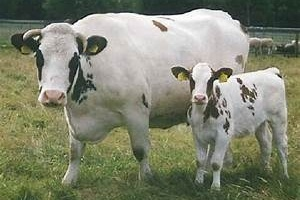

In [ ]:
# to display the image

In [ ]:
# anymal_type of above image
# write a Python script here that would return you the animal_type of above image

mucca


And it's correct

Well we are set, but there is a trick, Machine/Deep Learning models doesn't accept images, they accepts only numbers. We need to convert these images to their pixel values so that we can apply ML/DL Models. We can achieve this using cv2 (OpenCV) library. 

## Loading Image's Pixel Values
OpenCV's imread method helps in reading an image and getting its pixel values. You just need to provide the path of each image inside imread().

Finally, store the image as well as its label inside data.

In [8]:
# import cv2 library
import cv2

In [9]:
data = []    # initialize a list to store, each image's pixel values 
labels = []   # initialize a list to store each image's labels i.e. animal type
for i in range(len(train_data)):
  image_arr = cv2.imread(train_data['filepath'][i])     # for each i starting from 0, convert the ith image to array of pixels
  data.append(image_arr)
  # We also need to convert the categorical values i.e. 'mucca' and 'pecora' to numerical
  # Using conditional statement, we can do it here only. if mucca then 0, if pecora then 1
  if train_data['animal_type'][i] == 'mucca':           # if respective image's label is mucca
    labels.append(0)
  else:               # since there are only two type of animals, if the animal is not mucca, it will be pecora
    labels.append(1)      # This indexing needs to be remembered 'mucca' = 0 and 'pecora' = 1, this will be required when you convert your predictions on test data to categorical value again


In [10]:
# data and labels are in normal python list, you must convert it to numpy array. You can do it using a single command!
data_arr = np.array(data)
labels_arr = np.array(labels)

### Display image using pixel values
Using imshow from mtaplotlib.pyplot you can display an image using those pixel values

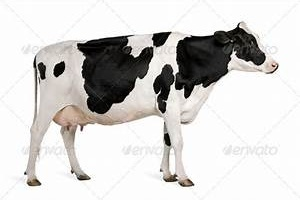

In [11]:
# For Colab users
from google.colab.patches import cv2_imshow
cv2_imshow(data_arr[9])

# waiting for key event
cv2.waitKey(0)

# destroying all windows
cv2.destroyAllWindows()

In [12]:
# respective labels
# label of the above image displayed
labels_arr[9]

0

0 means mucca, so it's correct

In [34]:
for img in data_arr:
  resized_image = cv2.resize(img, (350,300))

# Colab users: 
#cv2_imshow(resized_image[82])

One can flatten images depending on the model one is using

## Split the Data

In [14]:
from sklearn.model_selection import train_test_split
# Can split data using train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(data_arr, labels_arr, test_size=0.2, random_state=42)

In [49]:
X_train.shape, X_test.shape

((960, 200, 300, 3), (240, 200, 300, 3))

In [51]:
X_test_flattened= X_test.reshape(len(X_test), 200*300*3)


In [52]:
X_train_flattened= X_train.reshape(len(X_train), 200*300*3)

X_train_flattened.shape

(960, 180000)

## Building Model


In [19]:
import tensorflow as tf

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [39]:
#Augmenting the images
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
        tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
        tf.keras.layers.experimental.preprocessing.RandomZoom(0.2)
    ]
)


In [40]:
#Sequential way of building models

model = tf.keras.Sequential()
model.add(data_augmentation)
model.add(Flatten(input_shape=(200,300,3)))
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255))
model.add(tf.keras.layers.Dense(1024,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(2,activation='softmax'))

## Using ImageData generators to load data

In [21]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255., # rescaling
                                   rotation_range = 40,  # for augmentation
                                   width_shift_range = 0.2,
                                   validation_split = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1.0/255.,validation_split = 0.2)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1.0/255.)

In [55]:
X_train.shape, y_train.shape

((960, 200, 300, 3), (960,))

In [67]:
img_pix_ar = np.array(image_pixels)
img_sha = img_pix_ar.reshape(400,1,1,1)
img_sha.shape

(400, 1, 1, 1)

In [68]:
train_generator = train_datagen.flow((X_train),np.array(y_train), batch_size=32)
val_generator = val_datagen.flow(np.array(X_test), np.array(y_test), batch_size=32)
test_generator = test_datagen.flow((img_sha),  batch_size=32)

                                                   

In [36]:
X_train.shape, np.array(image_pixels).shape

((960, 200, 300, 3), (400,))

## Optimize Model

In [59]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [60]:
history = model.fit(
            train_generator,
            validation_data = val_generator,
            epochs = 10,
            verbose = 2)

Epoch 1/10
30/30 - 12s - loss: 0.6930 - accuracy: 0.5063 - val_loss: 0.6912 - val_accuracy: 0.6333
Epoch 2/10
30/30 - 12s - loss: 0.6931 - accuracy: 0.5073 - val_loss: 0.6865 - val_accuracy: 0.5125
Epoch 3/10
30/30 - 12s - loss: 0.6903 - accuracy: 0.5417 - val_loss: 0.6839 - val_accuracy: 0.6542
Epoch 4/10
30/30 - 12s - loss: 0.6896 - accuracy: 0.5573 - val_loss: 0.6783 - val_accuracy: 0.6458
Epoch 5/10
30/30 - 12s - loss: 0.6842 - accuracy: 0.5625 - val_loss: 0.6719 - val_accuracy: 0.6458
Epoch 6/10
30/30 - 12s - loss: 0.6802 - accuracy: 0.5813 - val_loss: 0.6665 - val_accuracy: 0.6583
Epoch 7/10
30/30 - 12s - loss: 0.6783 - accuracy: 0.5625 - val_loss: 0.6597 - val_accuracy: 0.6417
Epoch 8/10
30/30 - 12s - loss: 0.6795 - accuracy: 0.5646 - val_loss: 0.6564 - val_accuracy: 0.6125
Epoch 9/10
30/30 - 12s - loss: 0.6768 - accuracy: 0.5760 - val_loss: 0.6543 - val_accuracy: 0.6583
Epoch 10/10
30/30 - 12s - loss: 0.6839 - accuracy: 0.5604 - val_loss: 0.6533 - val_accuracy: 0.6792


In [63]:
 model.evaluate(val_generator, verbose=2)

8/8 - 0s - loss: 0.6533 - accuracy: 0.6792


[0.6532638669013977, 0.6791666746139526]

In [69]:
preds = model.predict(test_generator)

InvalidArgumentError: ignored

In [42]:
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
30/30 [==============================] - 2s 51ms/step - loss: 93.6822 - accuracy: 0.5177
Epoch 2/10
30/30 [==============================] - 1s 50ms/step - loss: 10.4083 - accuracy: 0.5177
Epoch 3/10
30/30 [==============================] - 2s 50ms/step - loss: 2.0791 - accuracy: 0.5458
Epoch 4/10
30/30 [==============================] - 1s 50ms/step - loss: 0.7880 - accuracy: 0.5719
Epoch 5/10
30/30 [==============================] - 2s 50ms/step - loss: 0.6744 - accuracy: 0.5833
Epoch 6/10
30/30 [==============================] - 2s 51ms/step - loss: 0.6819 - accuracy: 0.5573
Epoch 7/10
30/30 [==============================] - 2s 51ms/step - loss: 0.7429 - accuracy: 0.5927
Epoch 8/10
30/30 [==============================] - 2s 50ms/step - loss: 0.6678 - accuracy: 0.5990
Epoch 9/10
30/30 [==============================] - 2s 51ms/step - loss: 0.8312 - accuracy: 0.5875
Epoch 10/10
30/30 [==============================] - 2s 51ms/step - loss: 0.7260 - accuracy: 0.5792


In [43]:
model.evaluate(X_test, y_test)

8/8 [==============================] - 0s 6ms/step - loss: 0.6523 - accuracy: 0.6417


[0.6523312926292419, 0.6416666507720947]

# Loading the Test Data
We can load the test data similar to what we did with train_data

In [29]:
# Get the csv file given 'Testing_set_animals.csv'
test_image_ids = pd.read_csv("/content/Datasets/animal_data/Testing_set_animals.csv", names = ['filename'])  # there is no header in the csv file so we need to provide it. You can also do header = None
test_image_ids.head()

,filename
0,Image_1.jpg
1,Image_2.jpg
2,Image_3.jpg
3,Image_4.jpg
4,Image_5.jpg


In [30]:
# Get image paths
image_paths = ['/content/train_beg/' + fname for fname in test_image_ids['filename']]
image_paths

['/content/train_beg/Image_1.jpg',
 '/content/train_beg/Image_2.jpg',
 '/content/train_beg/Image_3.jpg',
 '/content/train_beg/Image_4.jpg',
 '/content/train_beg/Image_5.jpg',
 '/content/train_beg/Image_6.jpg',
 '/content/train_beg/Image_7.jpg',
 '/content/train_beg/Image_8.jpg',
 '/content/train_beg/Image_9.jpg',
 '/content/train_beg/Image_10.jpg',
 '/content/train_beg/Image_11.jpg',
 '/content/train_beg/Image_12.jpg',
 '/content/train_beg/Image_13.jpg',
 '/content/train_beg/Image_14.jpg',
 '/content/train_beg/Image_15.jpg',
 '/content/train_beg/Image_16.jpg',
 '/content/train_beg/Image_17.jpg',
 '/content/train_beg/Image_18.jpg',
 '/content/train_beg/Image_19.jpg',
 '/content/train_beg/Image_20.jpg',
 '/content/train_beg/Image_21.jpg',
 '/content/train_beg/Image_22.jpg',
 '/content/train_beg/Image_23.jpg',
 '/content/train_beg/Image_24.jpg',
 '/content/train_beg/Image_25.jpg',
 '/content/train_beg/Image_26.jpg',
 '/content/train_beg/Image_27.jpg',
 '/content/train_beg/Image_28.jpg',
 

In [31]:
# Confirm if number of images is same as number of labels given
len(image_paths)== len(test_image_ids)

True

In [32]:
# Create dataframe of image ids and filepaths
test_data = pd.DataFrame({'filename': test_image_ids.filename, 'filepath': image_paths})
test_data.head()

"""
please put the required data at ****
"""
# Again this is completely option to see if all the data images are in an order. You can skip this if you want

'\nplease put the required data at ****\n'

In [33]:
# Load image pixels using cv2
image_pixels = []
for i in range(len(test_data)):
  img_array = cv2.imread(test_data['filename'][i])
  image_pixels.append(img_array)

"""
Put required data at ****
"""

'\nPut required data at ****\n'

**Note:** Perform all the pre-processing steps that you did for train data

**Why do we need to do the same procedure of data preprocessing on the new test data as it was done for the training and validation data?**

**Ans:** Because our model has been trained on certain format of data and if we don’t provide the testing data in the similar format, the model might throw errors or in few cases it will give erroneous predictions and the rmse of the model will increase. Not confident about these statements? Well, as a data scientist you should always perform some experiment and observe the results. So keep experiment and try it out and see it by yourself!

## Prediction

In [45]:
# prediction
pred = model.predict(np.array(image_pixels))

ValueError: ignored


Note: If you use one output neuron while defining the model and loss as **binary_crossentropy** while compiling the model, you will get single probability value.

You can convert it to either integers i.e. 0 or 1 (that is our numerical target value) or directly to categorical 'mucca' (i.e. 0) or 'pecora' (i.e. 1)

**If our predictions are single probability value. There are two commonly used methods to get the actual labels in this case.**

1.   Using a threshold value
2.   Using np.round() function


These works for only binary class problems.

**But,** if you use more than one neuron in the output layer while defining the model and use sparse_categorical_crossentropy as loss function while compiling the model, you will get multiple probability values.

These are the probability values for each class. In this case you can use np.argmax() to get the required label. It will basically return the index of the probability value which is maximum.



**1. Take a threshold of 0.5**

If the probability value is less than or equal to 0.5, the prediction is 0 (i.e. mucca) else the prediction is 1 (i.e. pecora)

Since the submission format is given as

predictions = [‘mucca’, ‘pecora’, ‘pecora’, ‘mucca’, mucca’, ……...]


here we will convert the probability values in the same format, i.e. if probability value is less than or equal to 0.5, the prediction will be 'mucca' else the prediction will be 'pecora'

In [ ]:
prediction = []
for value in pred:
  if value <= 0.5:
    prediction.append(0)      # it can be 0 or your respective class 'mucca'
  else:
    prediction.append(1)      # it can be 1 or your respective class 'pecora'

**2. Using np.round() function**

In this case np.round() will return the nearest integer value.

*  This will return either 0 or 1

In [ ]:
predictions = np.round(pred)

In [ ]:
prediction = []
for item in pred:
  prediction.append(item)

**Note: Follow the submission guidelines given in ‘[How To Submit](https://discuss.dphi.tech/t/how-to-submit-predictions/548)’ Section.**

# **How to save prediciton results locally via jupyter notebook?**
If you are working on Jupyter notebook, execute below block of codes. A file named ‘submission.csv’ will be created in your current working directory.

In [ ]:
res = pd.DataFrame({'filename': test_data['filename'], 'animal_type': prediction})  # prediction is nothing but the final predictions of your model on input features of your new unseen test data
res.to_csv("submission.csv") 

# **OR,**
**If you are working on Google Colab then use the below set of code to save prediction results locally**

# **How to save prediction results locally via colab notebook?**
If you are working on Google Colab Notebook, execute below block of codes. A file named ‘submission’ will be downloaded in your system.

In [ ]:
res = pd.DataFrame({'filename': test_data['filename'], 'animal_type': prediction})  # prediction is nothing but the final predictions of your model on input features of your new unseen test data
res.to_csv("submission.csv") 

# To download the csv file locally
from google.colab import files        
files.download('submission.csv')